In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from data import KappaDataGenerator

In [2]:
velocity_A = np.load('styleA.npy')
velocity_B = np.load('styleB.npy')

In [3]:
print('Velocity A size:', velocity_A.shape)
print('Velocity B size:', velocity_B.shape)

Velocity A size: (500, 1, 70, 70)
Velocity B size: (500, 1, 70, 70)


Text(0.5, 1.0, 'km/s')

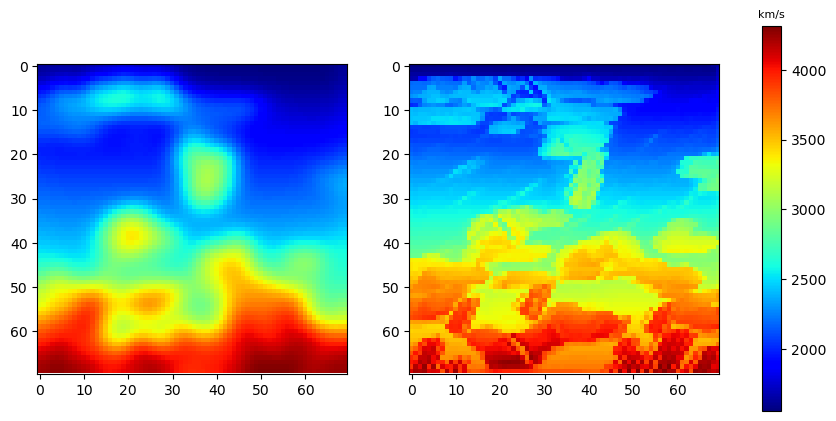

In [4]:
## Select a sample in the data
sample=np.random.randint(0,velocity_A.shape[0])

fig, ax = plt.subplots(1, 2, figsize=(11, 5))
img=ax[0].imshow(velocity_A[sample,0,:,:],cmap="jet")
img=ax[1].imshow(velocity_B[sample,0,:,:],cmap="jet")
clb=plt.colorbar(img, ax=ax)
clb.ax.set_title('km/s',fontsize=8)

In [5]:
class MinMaxScalerVectorized:
    """MinMax Scaler

    Transforms each channel to the range [a, b].

    Parameters
    ----------
    feature_range : tuple
        Desired range of transformed data.
    """

    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

    def __call__(self, tensor):
        """Fit features

        Parameters
        ----------
        stacked_features : tuple, list
            List of stacked features.

        Returns
        -------
        tensor
            A tensor with scaled features using requested preprocessor.
        """
        # Feature range
        a, b = self.feature_range
        return (tensor - tensor.min()) * (b - a) / (tensor.max() - tensor.min()) + a

In [6]:
N = 128
transform = transforms.Compose([
  transforms.ToPILImage(), 
  transforms.Resize((N, N)), 
  transforms.ToTensor(),
  MinMaxScalerVectorized(feature_range=(0.25,1)),
])

styleA1 = transform(velocity_A[0,0].astype(np.float32))[0]
styleB1 = transform(velocity_B[0,0].astype(np.float32))[0]
sample=np.random.randint(0,500)

styleA2 = transform(velocity_A[sample,0].astype(np.float32))[0]
styleB2 = transform(velocity_B[sample,0].astype(np.float32))[0]

In [7]:
dataset = KappaDataGenerator(N, N)
dataset.load_data(data="stl10")
kappa1 = dataset.generate_kappa().to(torch.float)
kappa2 = dataset.generate_kappa().to(torch.float)

Files already downloaded and verified


In [8]:
dataset = KappaDataGenerator(N, N)
dataset.load_data(data="cifar10")
cifar1 = dataset.generate_kappa().to(torch.float)
cifar2 = dataset.generate_kappa().to(torch.float)

Files already downloaded and verified


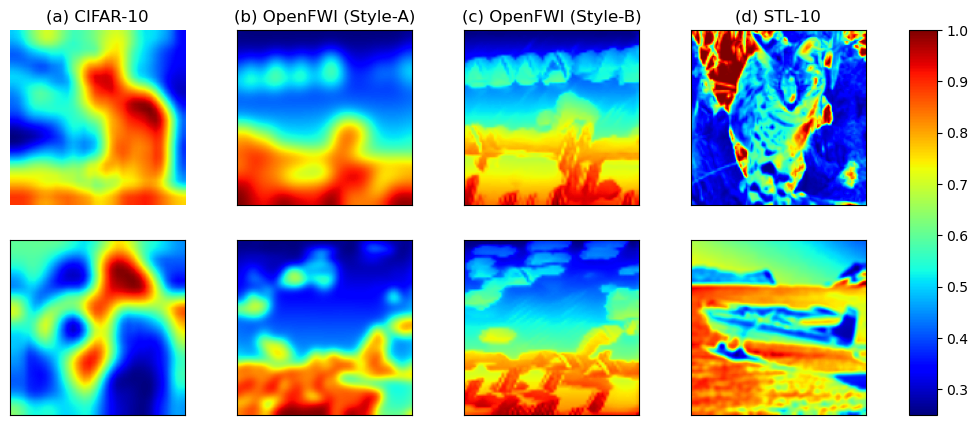

In [9]:
fig, axs = plt.subplots(2, 4, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 1, 1, 1]})

axs[0, 0].imshow(cifar1[0,0], cmap='jet', vmin=0.25, vmax=1) 
axs[0, 0].set_title("(a) CIFAR-10")
axs[0, 0].axis('off')  

im1 = axs[0, 1].imshow(styleA1, cmap='jet', vmin=0.25, vmax=1)
axs[0, 1].set_title("(b) OpenFWI (Style-A)")

im2 = axs[0, 2].imshow(styleB1, cmap='jet', vmin=0.25, vmax=1)
axs[0, 2].set_title("(c) OpenFWI (Style-B)")

im3 = axs[0, 3].imshow(kappa1[0,0], cmap='jet', vmin=0.25, vmax=1)
axs[0, 3].set_title("(d) STL-10")

axs[1, 0].imshow(cifar2[0,0], cmap='jet', vmin=0.25, vmax=1)
axs[1, 1].imshow(styleA2, cmap='jet', vmin=0.25, vmax=1)
axs[1, 2].imshow(styleB2, cmap='jet', vmin=0.25, vmax=1)
axs[1, 3].imshow(kappa2[0,0], cmap='jet', vmin=0.25, vmax=1)

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.11, 0.023, 0.77])  
fig.colorbar(im1, cax=cbar_ax)

In [10]:
dataset = KappaDataGenerator(N, N)
dataset.load_data(data="cifar10")

kappa = torch.zeros((10, 1, N, N))
for i in range(10):
    kappa[i, 0] = dataset.generate_kappa().reshape(N, N)

Files already downloaded and verified


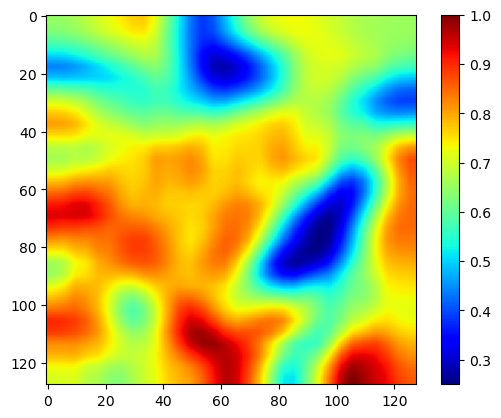

In [11]:
plt.imshow(kappa[0,0], cmap="jet")
plt.colorbar()

In [12]:
np.save("cifar.npy",kappa.numpy())

In [13]:
velocity = np.load('styleA.npy')
transform = transforms.Compose([
    transforms.ToPILImage(), 
    transforms.Resize((N, N)),
    transforms.ToTensor(),
    MinMaxScalerVectorized(feature_range=(0.25,1)),
])
kappa = []
for i in range(10):
    sample=np.random.randint(0,velocity.shape[0])
    img_tensor = transform(velocity[sample,0].astype(np.float32))[0]
    kappa.append(img_tensor.unsqueeze(0).unsqueeze(0))
kappa = torch.cat(kappa, dim=0)

In [14]:
kappa.shape

torch.Size([10, 1, 128, 128])

In [15]:
np.save("kappaA.npy",kappa.numpy())